<a href="https://colab.research.google.com/github/mlwright84/subtrib/blob/main/Exploration_of_Subprime_Tribonacci_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of Subprime Tribonacci Sequences

The code in this notebook accompanies the paper by Sara Barrows, Emily Noye, Sarah Uttormark, and Matthew Wright.


## Experiment 1: Find some cycles

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import sys
import pandas as pd
from sympy.ntheory import isprime

Function to remove the least proper prime factor of a number $n$. 

In [25]:
# function remove smallest proper prime factor
# if n is composite, then return n/(least prime factor of n)
# if n is prime, then return n
def removeLeastPrime(n):
  s = int(math.sqrt(n)) + 1
  for i in range(2, s):
    if n % i == 0:
      return n//i
  return n

Function to create a subprime tribonacci sequences of a specified length.
For some reason, appending is slightly faster than initializing a sequence of size $n$.

In [26]:
# function to compute a subprime tribonacci sequence of n terms, starting with a, b, c
def subTribSeq(a,b,c,n):  #a,b,c starting terms and n=number of terms
  seq = [a,b,c]
  for i in range(n-3):
    tribNum = seq[-3] + seq[-2] + seq[-1]
    #seq = seq + [removeLeastPrime(tribNum)]
    seq.append(removeLeastPrime(tribNum))

  # seq = [None]*n
  # seq[0] = a
  # seq[1] = b
  # seq[2] = c
  # for i in range(3,n): 
  #   tribNum = seq[i-3] + seq[i-2] + seq[i-1] # add last three values
  #   seq[i] = removeLeastPrime(tribNum)
  return(seq)

In [27]:
# testing
temp = subTribSeq(13,0,39,50)
print(*temp)

13 0 39 26 13 39 39 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13


Function to compute a subprime tribonacci sequence until a cycle is found or until a max number of terms is reached. Modified code from Emily, Sara, and Sarah.



Creating a `set` of triples should allow fast lookup, but could be memory intensive. 

In [28]:
# compute a subprime tribonacci sequence starting with integers a, b, c
# stop when a cycle is detected or when maxTerms terms have been computed
def findSubTribCycle(a, b, c, maxTerms):
  seq = [a,b,c]
  triples = { (a, b, c) } # initialize a _set_ containing a _tuple_

  for i in range(maxTerms - 3):
    tribNum = seq[-3] + seq[-2] + seq[-1]
    seq.append(removeLeastPrime(tribNum))

    nextTriple = (seq[-3], seq[-2], seq[-1])

    if nextTriple in triples: # then sequence has entered a cycle
      return (nextTriple, i+1)
    
    #else
    triples.add(nextTriple)

  # no cycle found in maxTerms terms
  return None

In [29]:
# EXAMPLE: start with 0, 1, 1; cycle confirmed after computing 4387 terms
findSubTribCycle(0,1,1,10000)

((37, 23, 31), 4387)

In [30]:
# EXAMPLE: start with 1, 1, 1; cycle confirmed after computing 4929 terms
print(findSubTribCycle(1,1,1,10000))
seq = subTribSeq(1,1,1,4932)
print(seq)
print(len(seq))

((23, 47, 23), 4929)
[1, 1, 1, 3, 5, 3, 11, 19, 11, 41, 71, 41, 51, 163, 85, 23, 271, 379, 673, 441, 1493, 869, 2803, 1033, 941, 281, 451, 239, 971, 151, 1361, 191, 131, 561, 883, 525, 179, 529, 411, 373, 101, 295, 769, 233, 1297, 209, 47, 1553, 603, 2203, 1453, 4259, 1583, 1459, 1043, 817, 3319, 5179, 3105, 283, 659, 1349, 79, 2087, 703, 151, 173, 79, 31, 283, 131, 89, 503, 241, 119, 863, 1223, 735, 403, 787, 385, 525, 1697, 869, 281, 949, 2099, 3329, 911, 2113, 6353, 9377, 2549, 6093, 487, 3043, 9623, 1879, 2909, 14411, 263, 5861, 6845, 4323, 17029, 9399, 4393, 4403, 6065, 2123, 4197, 2477, 463, 2379, 1773, 923, 1015, 1237, 635, 2887, 4759, 1183, 2943, 1777, 5903, 3541, 1603, 11047, 5397, 18047, 11497, 11647, 2423, 691, 509, 3623, 689, 1607, 1973, 1423, 5003, 227, 6653, 3961, 293, 839, 463, 319, 1621, 801, 2741, 1721, 277, 677, 535, 1489, 73, 699, 323, 365, 73, 761, 109, 41, 911, 1061, 671, 881, 871, 2423, 835, 4129, 89, 163, 337, 31, 177, 109, 317, 201, 209, 727, 379, 263, 37, 97, 3

In [31]:
# EXAMPLE: 37, 23, 31 starts a cycle of length 3174
findSubTribCycle(37, 23, 31, 10000)

((37, 23, 31), 3174)

In [32]:
# EXAMPLE: subprime tribonacci sequences starting with powers of 2
for i in range(12):
  temp = subTribSeq(2**i, 2**i, 2**i, 40)
  print(*temp)

1 1 1 3 5 3 11 19 11 41 71 41 51 163 85 23 271 379 673 441 1493 869 2803 1033 941 281 451 239 971 151 1361 191 131 561 883 525 179 529 411 373
2 2 2 3 7 6 8 7 7 11 5 23 13 41 11 13 13 37 21 71 43 45 53 47 29 43 17 89 149 85 19 23 127 13 163 101 277 541 919 579
4 4 4 6 7 17 15 13 15 43 71 43 157 271 157 195 89 147 431 29 607 97 733 479 187 1399 413 1999 103 503 521 161 395 359 305 353 339 997 563 633
8 8 8 12 14 17 43 37 97 59 193 349 601 381 121 1103 535 1759 79 791 239 1109 713 687 193 531 83 269 883 247 1399 843 131 791 353 425 523 1301 173 1997
16 16 16 24 28 34 43 35 56 67 79 101 19 199 29 19 19 67 35 11 113 53 59 75 17 151 81 83 105 269 457 277 59 61 397 47 101 109 257 467
32 32 32 48 56 68 86 105 37 114 128 93 67 144 152 121 139 206 233 289 364 443 548 271 631 725 1627 157 193 659 1009 1861 3529 2133 7523 4395 14051 25969 14805 18275
64 64 64 96 112 136 172 210 259 641 555 485 41 47 191 93 331 205 37 191 433 661 257 193 101 29 19 149 197 73 419 53 109 83 49 241 373 221 167 761
12

In [33]:
# another example
findSubTribCycle(125, 127, 52, 10000)

((251, 173, 217), 166)

In [34]:
# another example
findSubTribCycle(11, 71, 37, 10000)

((11, 71, 37), 3174)

In [35]:
# another example
temp = subTribSeq(10,0,8, 160)
print(*temp)

10 0 8 9 17 17 43 11 71 25 107 29 23 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35 37 25 97 53 35


In [36]:
# another example
temp = subTribSeq(1033, 493, 71, 160)
print(*temp)

1033 493 71 1597 2161 547 1435 1381 1121 127 239 1487 109 367 151 209 727 1087 289 701 67 151 919 379 483 137 333 953 1423 903 1093 263 753 703 573 2029 661 251 173 217 641 1031 1889 1187 1369 889 689 421 1999 3109 1843 2317 2423 227 4967 2539 703 8209 3817 4243 5423 139 1961 7523 9623 6369 4703 4139 2173 2203 1703 6079 1997 1397 9473 4289 5053 3763 2621 11437 251 349 12037 12637 8341 11005 10661 811 3211 14683 6235 8043 28961 14413 17139 20171 17241 7793 9041 6815 7883 7913 7537 23333 38783 69653 43923 1009 38195 27709 9559 4439 233 2033 2235 643 1637 1505 757 557 2819 4133 2503 1891 8527 4307 2945 509 2587 863 107 3557 1509 739 1935 89 921 589 533 681 601 605 629 367 1601 371 2339 1437 377 4153 1989 2173 1663 1165 1667 899 533 1033 493 71


### Experiment 2: look for cycles from 10,000 starting triples

This code examines 10,000 starting triples of the form $(0, 1, c)$. This takes about two minutes and finds cycles for all of the sequences.

runtime: 111.91536498069763
didn't find a cycle for 0 sequences
found 108 different triples that begin cycles


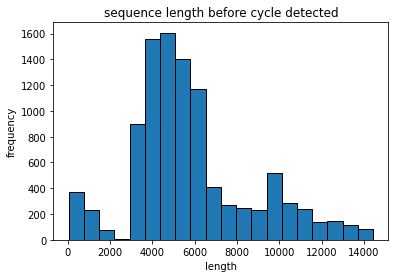

In [14]:
t0 = time.time()

noCycle = 0         # count how many times we don't find a cycle
lenList = []        # track the lengths of the sequences before we detect a cycle
tripleSet = set()   # track the triples that begin each cycle

for c in range(10000):
  res = findSubTribCycle(0, 1, c, 100000)
  if res == None:
    noCycle += 1
  else:
    lenList.append(res[1])
    tripleSet.add(res[0])

t1 = time.time()

print("runtime:", t1-t0)
print(f"didn't find a cycle for {noCycle} sequences")
print(f"found {len(tripleSet)} different triples that begin cycles")

plt.hist(lenList, bins=20, alpha=1, linewidth=1, edgecolor='black')
plt.title("sequence length before cycle detected")
plt.xlabel("length")
plt.ylabel("frequency");

The cycles found above start with the following triples:

In [16]:
print(*tripleSet)

(53, 239, 115) (103, 167, 193) (31, 307, 127) (175, 29, 31) (23, 43, 13) (137, 191, 121) (109, 425, 41) (389, 217, 37) (373, 89, 283) (47, 37, 131) (71, 37, 17) (103, 31, 17) (43, 67, 71) (53, 31, 23) (47, 79, 23) (37, 167, 83) (29, 31, 47) (89, 67, 47) (37, 19, 19) (393, 301, 61) (43, 37, 139) (61, 53, 103) (83, 167, 281) (97, 101, 31) (97, 107, 19) (241, 151, 203) (67, 47, 29) (59, 43, 37) (245, 43, 67) (83, 47, 19) (107, 67, 47) (115, 37, 23) (43, 67, 41) (47, 107, 37) (41, 41, 31) (31, 29, 11) (17, 55, 23) (199, 175, 29) (47, 23, 31) (67, 281, 109) (229, 83, 67) (23, 31, 13) (157, 97, 107) (337, 73, 41) (37, 79, 49) (197, 53, 293) (29, 95, 37) (133, 155, 23) (131, 29, 19) (181, 31, 101) (73, 185, 131) (73, 59, 89) (281, 109, 457) (73, 83, 19) (1033, 47, 97) (41, 31, 113) (139, 1459, 887) (67, 47, 17) (79, 447, 73) (71, 19, 43) (73, 167, 61) (23, 47, 23) (37, 199, 95) (373, 137, 107) (31, 65, 17) (59, 121, 17) (79, 71, 197) (139, 73, 83) (121, 121, 59) (223, 761, 209) (379, 1129, 71

Now find out which cycles _of length greater than 3_ correspond to each of the above triples. Don't include duplicate cycles.

In [17]:
# determine whether a triple appears in a cycle
def appearsIn(triple, cycle):
  triple = list(triple)
  for i in range(len(cycle)-2):
    if triple == cycle[i:i+3]:
      return True
  if triple == cycle[-2:] + [cycle[0]] or triple == [cycle[-1]] + cycle[:2]:
    return True
  return False

# find cycles of length greater than 3 from a set of triples
def findCyclesFromTriples(tripleSet):
  # initialize list of cycles
  cycleList = []

  # loop over all triples
  for t in tripleSet:
    #print("considering", t)

    # ignore trivial cycles
    if t[0] == t[1] == t[2]:
      continue

    # ignore cycles of length 2
    if t[0] == t[2] and (t[1] == 2*t[0] or 2*t[1] == t[0]):
      continue

    # does this triple appear in some cycle?
    found = False
    for c in cycleList:
      found = appearsIn(t, c)
      if found:
        break

    # if cycle was not found, then add it to the cycle set
    if not found:
      length = findSubTribCycle(t[0], t[1], t[2], 100000)[1]
      cycle = subTribSeq(t[0], t[1], t[2], length)
      cycleList.append(cycle)
      print("appending cycle of length", len(cycle))
  
  return cycleList

In [19]:
# testing
print(appearsIn( (1, 2, 3), [1, 2, 3, 5, 6]) )
print(appearsIn( (1, 2, 3), [4, 3, 1, 2, 3, 5, 6]) )
print(appearsIn( (1, 2, 3), [3, 3, 2, 2, 3, 5, 6, 1, 2]) )
print(appearsIn( (1, 2, 3), [2, 3, 3, 2, 2, 3, 5, 6, 1]) )
print(appearsIn( (1, 2, 3), [4, 5, 3, 5, 1, 2, 3]) )
print(appearsIn( (1, 2, 3), [4, 3, 3, 2, 3, 5, 6]) )

True
True
True
True
True
False


In [20]:
cycleList = findCyclesFromTriples(tripleSet)
print(f"found {len(cycleList)} unique cycles")

appending cycle of length 3174
appending cycle of length 93
appending cycle of length 203
appending cycle of length 6
appending cycle of length 5
found 5 unique cycles


Here are the cycles found so far. Each line of output is as follows:

`cycle length : numbers in cycle`

In [21]:
for c in cycleList:
  print(len(c), ":", *c)

3174 : 53 239 115 37 23 35 19 11 13 43 67 41 151 37 229 139 135 503 259 299 1061 1619 993 3673 2095 6761 1139 1999 521 3659 167 1449 1055 2671 1725 1817 2071 1871 443 877 3191 347 883 4421 5651 2191 12263 4021 3695 19979 5539 223 25741 10501 12155 48397 1733 12457 8941 23131 14843 9383 2059 5257 16699 8005 9987 307 631 2185 1041 551 1259 2851 79 71 3001 137 3209 577 3923 593 463 383 1439 457 53 1949 2459 1487 1965 257 3709 1977 1981 697 931 1203 149 761 2113 3023 5897 1003 9923 16823 27749 18165 1459 15791 11805 9685 12427 2609 419 3091 211 61 1121 199 1381 73 551 401 205 89 139 433 661 411 301 1373 695 103 167 193 463 823 493 593 83 167 281 177 125 53 71 83 69 223 125 139 487 751 459 1697 969 625 1097 897 873 61 1831 553 815 457 365 1637 2459 1487 1861 5807 1831 1357 1799 4987 479 1453 629 197 53 293 181 31 101 313 89 503 181 773 47 143 321 73 179 191 443 271 181 179 631 991 1801 1141 1311 4253 2235 709 2399 1781 4889 3023 3231 1013 559 1601 167 179 649 199 79 309 587 325 407 1319 293

In [22]:
cycleList[4]

[53, 35, 37, 25, 97]

## Experiment 3: $m^3$ starting triples

This code examines $m^3$ starting triples of the form $(a, b, c)$, for $a, b, c \in \{0, 1, 2, \ldots, m-1\}$ and finds a cycle for all of the sequences, with max terms set to 10,000,000. 

**CAUTION: This code might take a long time to run.** Using a local runtime on Matthew's computer, this code runs in about 260 seconds when $m=30$ and about 20 minutes when $m=50$.

runtime: 255.82805681228638
didn't find a cycle for 0 sequences
found 128 different triples that begin cycles


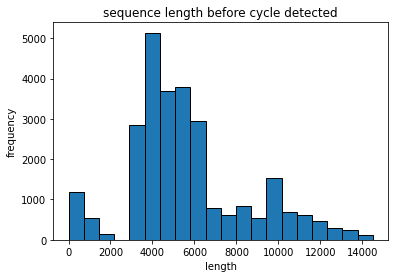

In [37]:
t0 = time.time()

m = 30              # max starting integer is m-1
maxTerms = 10000000 # max number of terms to compute in any sequence
noCycle = 0         # count how many times we don't find a cycle
lenList = []        # track the lengths of the sequences before we detect a cycle
tripleSet = set()   # track the triples that begin each cycle

for a in range(m):
  for b in range(m):
    for c in range(m):
      res = findSubTribCycle(a, b, c, maxTerms)
      if res == None:
        noCycle += 1
      else:
        lenList.append(res[1])
        tripleSet.add(res[0])

t1 = time.time()

print("runtime:", t1-t0)
print(f"didn't find a cycle for {noCycle} sequences")
print(f"found {len(tripleSet)} different triples that begin cycles")

plt.hist(lenList, bins=20, alpha=1, linewidth=1, edgecolor='black')
plt.title("sequence length before cycle detected")
plt.xlabel("length")
plt.ylabel("frequency");

In [44]:
# determine which cycles were found in the experiment
cycleList = findCyclesFromTriples(tripleSet)
print(f"\nfound {len(cycleList)} unique cycles")
for c in cycleList:
  print("length", len(c), ":", *c)

appending cycle of length 3174
appending cycle of length 4
appending cycle of length 203
appending cycle of length 93
appending cycle of length 4
appending cycle of length 4
appending cycle of length 4
appending cycle of length 6
appending cycle of length 5

found 9 unique cycles
length 3174 : 175 29 59 263 117 439 273 829 67 167 1063 1297 361 907 855 193 391 1439 289 163 61 171 79 311 187 577 215 89 881 395 455 577 1427 2459 4463 2783 3235 223 79 1179 1481 913 1191 1195 3299 1895 6389 3861 2429 409 2233 461 107 2801 1123 139 239 79 457 155 691 1303 307 767 2377 493 3637 2169 6299 4035 12503 557 3419 5493 557 557 6607 1103 1181 523 401 421 269 1091 137 499 157 61 239 457 757 1453 889 1033 1125 277 487 1889 379 551 2819 163 3533 1303 4999 1967 8269 3047 359 2335 5741 1687 751 8179 3539 337 2411 6287 1807 2101 2039 313 73 485 67 125 677 79 881 1637 371 963 2971 1435 767 739 173 73 197 443 31 61 107 199 367 673 413 1453 2539 881 443 3863 1729 1207 523 1153 961 879 73 1913 955 173 3041 379

## Experiment 4: Identify the cycle type of 1 billion sequences!

This code examines all subprime tribonacci sequences starting with integers $a, b, c \in \{0, 1, \ldots, 1000\}$, and determines the cycle type for each. For increased search efficiency, it maintains a dictionary of triples that lead to known wild cycles.

**CAUTION: This code takes about a day to run and uses about 10 GB of memory.**

In [45]:
# first, create a list of known wild cycles (found in earlier experiments)
wildCycles = [None]*9
# length 5:
wildCycles[0] = [37, 25, 97, 53, 35]
# length 6:
wildCycles[1] = [37, 139, 73, 83, 59, 43]
# length 29:
wildCycles[2] = [295, 83, 83, 461, 209, 251, 307, 59, 617, 983, 553, 2153, 527, 61, 2741, 3329, 6131, 4067, 4509, 2101, 3559, 10169, 1439, 523, 1733, 739, 599, 83, 203]
# length 30
wildCycles[3] = [47, 151, 211, 409, 257, 877, 1543, 2677, 1699, 1973, 907, 241, 3121, 1423, 1595, 877, 779, 3251, 701, 1577, 1843, 317, 101, 323, 247, 61, 631, 313, 335, 1279]
# length 70:
wildCycles[4] = [943, 191, 79, 1213, 1483, 925, 1207, 1205, 71, 191, 489, 751, 477, 101, 443, 1021, 313, 1777, 1037, 59, 221, 439, 719, 197, 271, 1187, 331, 1789, 3307, 1809, 1381, 89, 1093, 233, 283, 1609, 425, 331, 473, 1229, 107, 603, 277, 329, 403, 1009, 1741, 1051, 1267, 1353, 3671, 2097, 7121, 12889, 7369, 2489, 989, 10847, 4775, 5537, 7053, 3473, 16063, 8863, 4057, 9661, 7527, 4249, 1649, 4475]
# length 93:
wildCycles[5] = [47, 37, 131, 43, 211, 77, 331, 619, 79, 343, 347, 769, 1459, 515, 211, 437, 1163, 1811, 1137, 4111, 2353, 691, 2385, 89, 1055, 3529, 4673, 9257, 1343, 5091, 1207, 2547, 1769, 1841, 131, 1247, 1073, 817, 3137, 457, 401, 799, 1657, 2857, 1771, 2095, 2241, 197, 1511, 359, 689, 853, 1901, 313, 3067, 5281, 2887, 3745, 3971, 461, 629, 1687, 2777, 463, 379, 517, 453, 71, 347, 67, 97, 73, 79, 83, 47, 19, 149, 43, 211, 31, 95, 337, 463, 179, 89, 43, 311, 443, 797, 517, 251, 313, 47]
# length 157:
wildCycles[6] = [1033, 493, 71, 1597, 2161, 547, 1435, 1381, 1121, 127, 239, 1487, 109, 367, 151, 209, 727, 1087, 289, 701, 67, 151, 919, 379, 483, 137, 333, 953, 1423, 903, 1093, 263, 753, 703, 573, 2029, 661, 251, 173, 217, 641, 1031, 1889, 1187, 1369, 889, 689, 421, 1999, 3109, 1843, 2317, 2423, 227, 4967, 2539, 703, 8209, 3817, 4243, 5423, 139, 1961, 7523, 9623, 6369, 4703, 4139, 2173, 2203, 1703, 6079, 1997, 1397, 9473, 4289, 5053, 3763, 2621, 11437, 251, 349, 12037, 12637, 8341, 11005, 10661, 811, 3211, 14683, 6235, 8043, 28961, 14413, 17139, 20171, 17241, 7793, 9041, 6815, 7883, 7913, 7537, 23333, 38783, 69653, 43923, 1009, 38195, 27709, 9559, 4439, 233, 2033, 2235, 643, 1637, 1505, 757, 557, 2819, 4133, 2503, 1891, 8527, 4307, 2945, 509, 2587, 863, 107, 3557, 1509, 739, 1935, 89, 921, 589, 533, 681, 601, 605, 629, 367, 1601, 371, 2339, 1437, 377, 4153, 1989, 2173, 1663, 1165, 1667, 899, 533]
# length 203:
wildCycles[7] = [317, 193, 131, 641, 193, 193, 79, 155, 61, 59, 55, 35, 149, 239, 141, 23, 31, 65, 17, 113, 65, 65, 81, 211, 119, 137, 467, 241, 169, 877, 429, 295, 1601, 775, 2671, 721, 1389, 683, 931, 1001, 523, 491, 403, 109, 59, 571, 739, 37, 449, 245, 43, 67, 71, 181, 29, 281, 491, 267, 1039, 599, 635, 2273, 1169, 1359, 4801, 2443, 1229, 229, 83, 67, 379, 23, 67, 67, 157, 97, 107, 19, 223, 349, 197, 769, 263, 1229, 323, 605, 719, 549, 1873, 1047, 3469, 6389, 3635, 131, 3385, 7151, 10667, 3029, 6949, 4129, 14107, 8395, 8877, 31379, 16217, 56473, 14867, 87557, 8363, 36929, 44283, 17915, 14161, 25453, 57529, 32381, 115363, 881, 29725, 145969, 35315, 2671, 36791, 2021, 3191, 14001, 19213, 12135, 449, 10599, 239, 11287, 7375, 461, 1471, 227, 127, 365, 719, 173, 419, 437, 343, 109, 127, 193, 143, 463, 47, 653, 1163, 621, 2437, 1407, 893, 1579, 1293, 1255, 4127, 2225, 7607, 4653, 2897, 659, 8209, 2353, 1603, 4055, 8011, 13669, 5147, 193, 19009, 1873, 7025, 2537, 2287, 697, 5521, 2835, 823, 137, 1265, 445, 1847, 3557, 5849, 3751, 223, 893, 157, 67, 1117, 447, 233, 599, 1279, 2111, 3989, 157, 6257, 103, 931]
# length 3174:
wildCycles[8] = [59, 229, 127, 83, 439, 59, 83, 83, 75, 241, 133, 449, 823, 281, 1553, 2657, 1497, 439, 1531, 3467, 5437, 2087, 379, 1129, 719, 131, 1979, 943, 71, 73, 1087, 1231, 797, 623, 241, 151, 203, 119, 43, 73, 47, 163, 283, 29, 95, 37, 23, 31, 13, 67, 37, 39, 13, 89, 47, 149, 95, 97, 31, 223, 117, 53, 131, 43, 227, 401, 61, 53, 103, 31, 17, 151, 199, 367, 239, 161, 59, 153, 373, 195, 103, 61, 359, 523, 41, 71, 127, 239, 23, 389, 217, 37, 643, 299, 89, 1031, 473, 531, 407, 83, 1021, 1511, 523, 611, 529, 1663, 2803, 1665, 6131, 3533, 11329, 2999, 337, 2933, 6269, 9539, 6247, 4411, 1063, 3907, 3127, 2699, 9733, 15559, 1217, 3787, 20563, 691, 8347, 9867, 3781, 4399, 18047, 26227, 48673, 2267, 77167, 18301, 19547, 23003, 8693, 17081, 16259, 14011, 47351, 77621, 10691, 45221, 44511, 431, 90163, 45035, 10433, 1063, 56531, 1153, 4519, 3659, 1333, 9511, 14503, 8449, 10821, 33773, 17681, 12455, 21303, 51439, 28399, 101141, 2549, 5743, 109433, 23545, 12611, 145589, 36349, 757, 36539, 14729, 10405, 61673, 12401, 3673, 77747, 13403, 94823, 61991, 56739, 213553, 110761, 4591, 109635, 32141, 48789, 38113, 39681,
                 126583, 204377, 123547, 454507, 60187, 212747, 66131, 67813, 4177, 3733, 25241, 33151, 12425, 3079, 9731, 5047, 2551, 1333, 2977, 2287, 2199, 439, 985, 3623, 721, 73, 631, 475, 393, 1499, 789, 383, 2671, 1281, 1445, 1799, 905, 1383, 67, 785, 745, 1597, 59, 343, 1999, 343, 895, 1079, 331, 461, 1871, 2663, 1665, 6199, 3509, 3791, 13499, 6933, 24223, 14885, 15347, 10891, 2419, 28657, 13989, 9013, 51659, 24887, 1277, 25941, 10421, 5377, 13913, 2701, 21991, 7721, 32413, 12425, 4043, 6983, 7817, 6281, 7027, 4225, 197, 107, 647, 317, 357, 1321, 665, 781, 2767, 383, 3931, 97, 401, 103, 601, 221, 185, 53, 153, 23, 229, 135, 129, 29, 293, 41, 121, 91, 23, 47, 23, 31, 101, 31, 163, 59, 23, 49, 131, 29, 19, 179, 227, 85, 491, 73, 59, 89, 17, 55, 23, 19, 97, 139, 85, 107, 331, 523, 31, 295, 283, 203, 71, 557, 277, 181, 203, 661, 209, 37, 907, 1153, 699, 89, 647, 287, 341, 425, 351, 1117, 631, 2099, 3847, 6577, 1789, 4071, 12437, 6099, 1739, 4055, 1699, 127, 5881, 2569, 2859, 263, 1897, 1673, 3833, 673, 167, 4673, 149, 1663, 1297, 3109, 2023, 2143, 2425, 2197, 2255, 529, 293, 181, 59, 41, 281, 127, 449,
                 857, 1433, 913, 3203, 179, 859, 4241, 5279, 107, 3209, 2865, 883, 2319, 6067, 713, 3033, 3271, 2339, 2881, 1213, 919, 1671, 3803, 2131, 2535, 2823, 7489, 443, 3585, 3839, 7867, 5097, 5601, 3713, 14411, 4745, 7623, 439, 4269, 1121, 1943, 7333, 281, 503, 8117, 2967, 11587, 7557, 22111, 8251, 5417, 967, 2927, 9311, 2641, 14879, 3833, 163, 3775, 409, 1449, 131, 663, 2243, 3037, 1981, 137, 1031, 67, 247, 269, 53, 569, 297, 919, 595, 1811, 665, 83, 853, 1601, 59, 359, 673, 1091, 193, 103, 73, 123, 23, 73, 73, 13, 53, 139, 41, 233, 59, 111, 31, 67, 19, 39, 25, 83, 49, 157, 17, 223, 397, 91, 237, 145, 43, 85, 91, 73, 83, 19, 35, 137, 191, 121, 449, 761, 121, 121, 59, 43, 223, 65, 331, 619, 203, 1153, 395, 103, 127, 125, 71, 19, 43, 19, 27, 89, 45, 23, 157, 75, 85, 317, 159, 187, 221, 189, 199, 203, 197, 599, 333, 1129, 687, 307, 193, 1187, 241, 1621, 3049, 1637, 901, 151, 2689, 1247, 67, 4003, 409, 1493, 1181, 3083, 1919, 2061, 1009, 1663, 4733, 1481, 7877, 4697, 4685, 5753, 5045, 5161, 15959, 5233, 1387, 337, 2319, 311, 989, 517, 79, 317, 83, 479, 293, 285, 151, 243, 97, 491, 277, 173, 941, 107,
                 407, 485, 333, 245, 1063, 547, 371, 283, 1201, 371, 371, 67, 809, 43, 919, 253, 405, 83, 247, 245, 115, 607, 967, 563, 2137, 193, 263, 2593, 3049, 1181, 6823, 1579, 1369, 3257, 1241, 5867, 3455, 3521, 4281, 11257, 6353, 7297, 24907, 38557, 23587, 29017, 30387, 2243, 20549, 7597, 30389, 11707, 7099, 9839, 5729, 1193, 5587, 1787, 659, 277, 389, 265, 133, 787, 395, 263, 289, 947, 1499, 547, 73, 163, 261, 71, 165, 71, 307, 181, 43, 177, 401, 207, 157, 255, 619, 1031, 635, 457, 193, 257, 907, 59, 1223, 199, 1481, 2903, 4583, 2989, 2095, 1381, 2155, 1877, 5413, 1889, 137, 173, 733, 149, 211, 1093, 1453, 919, 1155, 3527, 1867, 2183, 7577, 1661, 3807, 2609, 197, 389, 1065, 127, 527, 573, 409, 503, 495, 469, 489, 1453, 2411, 1451, 1063, 985, 3499, 1849, 2111, 7459, 601, 1453, 3171, 1045, 5669, 3295, 10009, 18973, 10759, 13247, 42979, 13397, 69623, 773, 27931, 98327, 127031, 13331, 79563, 43985, 136879, 86809, 38239, 87309, 2909, 42819, 769, 15499, 8441, 24709, 48649, 81799, 51719, 182167, 63137, 297023, 5591, 121917, 14639, 3467, 10771, 431, 14669, 631, 15731, 4433, 4159, 1871, 10463, 16493, 9609,
                 7313, 6683, 4721, 6239, 5881, 1531, 1241, 509, 193, 67, 769, 343, 393, 301, 61, 151, 171, 383, 235, 263, 881, 197, 447, 305, 73, 275, 653, 143, 357, 1153, 551, 687, 797, 407, 61, 253, 103, 139, 165, 37, 31, 233, 43, 307, 53, 31, 23, 107, 23, 51, 181, 85, 317, 53, 91, 461, 121, 673, 251, 209, 103, 563, 175, 29, 59, 263, 117, 439, 273, 829, 67, 167, 1063, 1297, 361, 907, 855, 193, 391, 1439, 289, 163, 61, 171, 79, 311, 187, 577, 215, 89, 881, 395, 455, 577, 1427, 2459, 4463, 2783, 3235, 223, 79, 1179, 1481, 913, 1191, 1195, 3299, 1895, 6389, 3861, 2429, 409, 2233, 461, 107, 2801, 1123, 139, 239, 79, 457, 155, 691, 1303, 307, 767, 2377, 493, 3637, 2169, 6299, 4035, 12503, 557, 3419, 5493, 557, 557, 6607, 1103, 1181, 523, 401, 421, 269, 1091, 137, 499, 157, 61, 239, 457, 757, 1453, 889, 1033, 1125, 277, 487, 1889, 379, 551, 2819, 163, 3533, 1303, 4999, 1967, 8269, 3047, 359, 2335, 5741, 1687, 751, 8179, 3539, 337, 2411, 6287, 1807, 2101, 2039, 313, 73, 485, 67, 125, 677, 79, 881, 1637, 371, 963, 2971, 1435, 767, 739, 173, 73, 197, 443, 31, 61, 107, 199, 367, 673, 413, 1453, 2539, 881, 443, 3863,
                 1729, 1207, 523, 1153, 961, 879, 73, 1913, 955, 173, 3041, 379, 3593, 7013, 2197, 1829, 1577, 431, 1279, 173, 269, 1721, 721, 2711, 5153, 1717, 871, 7741, 3443, 2411, 2719, 8573, 193, 2297, 851, 257, 1135, 2243, 727, 821, 223, 253, 1297, 591, 2141, 1343, 815, 1433, 1197, 689, 3319, 1735, 5743, 3599, 1007, 131, 1579, 247, 103, 643, 331, 359, 43, 733, 227, 59, 1019, 435, 89, 1543, 689, 211, 349, 1249, 603, 71, 641, 263, 325, 1229, 79, 71, 197, 347, 205, 107, 659, 971, 579, 47, 1597, 741, 795, 241, 1777, 97, 705, 2579, 1127, 401, 1369, 2897, 359, 925, 113, 127, 233, 43, 31, 307, 127, 155, 31, 313, 499, 281, 1093, 1873, 191, 451, 503, 229, 169, 53, 41, 263, 119, 141, 523, 261, 185, 323, 769, 1277, 103, 307, 241, 217, 255, 31, 503, 263, 797, 521, 527, 615, 1663, 935, 1071, 1223, 3229, 1841, 899, 127, 61, 1087, 425, 143, 331, 31, 101, 463, 119, 683, 253, 211, 37, 167, 83, 41, 97, 17, 31, 29, 11, 71, 37, 17, 25, 79, 11, 23, 113, 49, 37, 199, 95, 331, 125, 29, 97, 251, 29, 29, 103, 23, 31, 157, 211, 133, 167, 73, 373, 613, 353, 103, 1069, 305, 211, 317, 119, 647, 361, 161, 167, 53, 127, 347, 31, 
                 101, 479, 47, 209, 245, 167, 207, 619, 331, 89, 1039, 1459, 199, 899, 2557, 731, 79, 481, 1291, 617, 2389, 4297, 109, 2265, 953, 1109, 4327, 6389, 2365, 127, 107, 113, 347, 189, 59, 119, 367, 109, 119, 119, 347, 195, 661, 401, 419, 1481, 767, 889, 3137, 4793, 8819, 5583, 3839, 1073, 2099, 2337, 787, 1741, 973, 1167, 3881, 2007, 1411, 2433, 5851, 1939, 10223, 18013, 6035, 797, 4969, 11801, 1597, 18367, 6353, 26317, 7291, 449, 34057, 5971, 2381, 42409, 2207, 46997, 5389, 7799, 12037, 5045, 179, 421, 1129, 247, 599, 395, 73, 97, 113, 283, 29, 85, 397, 73, 185, 131, 389, 235, 151, 155, 541, 121, 43, 235, 133, 137, 101, 53, 97, 251, 401, 107, 253, 761, 59, 37, 857, 953, 1847, 1219, 4019, 1417, 1331, 101, 407, 613, 59, 83, 151, 293, 31, 95, 419, 109, 89, 617, 163, 79, 859, 367, 435, 151, 953, 513, 539, 401, 1453, 2393, 137, 569, 1033, 47, 97, 107, 251, 91, 449, 113, 653, 405, 1171, 743, 773, 2687, 1401, 4861, 2983, 1849, 3231, 733, 5813, 3259, 1961, 1003, 889, 3853, 1915, 2219, 1141, 1055, 883, 3079, 173, 827, 4079, 1693, 6599, 139, 8431, 2167, 3579, 14177, 6641, 787, 4321, 379, 1829, 6529, 8737,
                 3419, 3737, 691, 1121, 179, 181, 1481, 263, 385, 2129, 2777, 481, 5387, 1729, 107, 233, 2069, 803, 1035, 3907, 1915, 6857, 409, 9181, 16447, 8679, 4901, 10009, 7863, 7591, 25463, 13639, 881, 39983, 54503, 31789, 25255, 337, 19127, 227, 2813, 7389, 10429, 6877, 4939, 7415, 19231, 6317, 4709, 383, 3803, 2965, 7151, 449, 2113, 883, 689, 737, 2309, 1245, 613, 1389, 191, 731, 2311, 61, 107, 67, 47, 17, 131, 65, 71, 89, 75, 47, 211, 111, 123, 89, 19, 77, 37, 19, 19, 25, 21, 13, 59, 31, 103, 193, 109, 135, 23, 89, 19, 131, 239, 389, 253, 881, 1523, 2657, 1687, 5867, 10211, 3553, 293, 14057, 17903, 10751, 14237, 14297, 13095, 5947, 11113, 6031, 7697, 24841, 38569, 337, 21249, 12031, 33617, 22299, 22649, 15713, 60661, 99023, 4079, 5647, 6397, 701, 2549, 877, 4127, 1079, 869, 2025, 137, 433, 865, 287, 317, 113, 239, 223, 115, 577, 305, 997, 1879, 3181, 2019, 7079, 4093, 4397, 15569, 3437, 7801, 2437, 2735, 12973, 3629, 317, 2417, 2121, 971, 787, 1293, 1017, 163, 2473, 281, 2917, 107, 661, 737, 301, 1699, 391, 797, 2887, 815, 409, 4111, 1067, 151, 73, 1291, 505, 623, 59, 1187, 623, 623, 811, 187, 1621, 
                 873, 383, 959, 443, 595, 1997, 607, 457, 3061, 1375, 1631, 6067, 211, 719, 6997, 7927, 15643, 10189, 11253, 7417, 28859, 15843, 17373, 12415, 45631, 1423, 19823, 66877, 12589, 99289, 59585, 619, 457, 60661, 20579, 11671, 13273, 45523, 23489, 16457, 85469, 41805, 20533, 49269, 479, 23427, 14635, 12847, 50909, 283, 3767, 54959, 59009, 39245, 51071, 49775, 46697, 49181, 48551, 48143, 48625, 5011, 5987, 547, 2309, 239, 619, 3167, 805, 4591, 8563, 4653, 17807, 10341, 32801, 8707, 17283, 19597, 45587, 27489, 30891, 103967, 5237, 28019, 45741, 401, 74161, 40101, 38221, 1097, 26473, 5981, 4793, 5321, 5365, 673, 307, 2115, 619, 3041, 1925, 1117, 869, 3911, 5897, 3559, 13367, 787, 17713, 2897, 21397, 6001, 6059, 33457, 1979, 8299, 8747, 3805, 719, 577, 5101, 6397, 4025, 817, 11239, 1237, 4431, 1537, 1441, 239, 3217, 83, 3539, 977, 1533, 263, 59, 371, 231, 661, 421, 101, 169, 691, 31, 297, 1019, 449, 353, 607, 1409, 103, 163, 335, 601, 157, 1093, 617, 1867, 511, 599, 229, 103, 133, 155, 23, 311, 163, 71, 109, 49, 229, 129, 37, 79, 49, 55, 61, 55, 57, 173, 95, 65, 111, 271, 149, 177, 199, 175, 29, 31,
                 47, 107, 37, 191, 67, 59, 317, 443, 273, 1033, 583, 1889, 701, 167, 919, 1787, 221, 2927, 1645, 4793, 1873, 8311, 881, 2213, 2281, 1075, 5569, 2975, 9619, 443, 13037, 23099, 12193, 1559, 857, 2087, 1501, 889, 407, 2797, 4093, 7297, 4729, 5373, 137, 3413, 8923, 12473, 24809, 9241, 46523, 409, 4321, 479, 5209, 10009, 1427, 3329, 2953, 593, 1375, 703, 2671, 1583, 4957, 151, 6691, 3933, 2155, 983, 2357, 1099, 193, 89, 1381, 1663, 241, 1095, 2999, 1445, 191, 1545, 3181, 1639, 1273, 2031, 4943, 2749, 3241, 841, 2277, 6359, 3159, 2359, 3959, 3159, 3159, 239, 83, 59, 127, 269, 91, 487, 121, 233, 29, 383, 215, 209, 269, 231, 709, 403, 79, 397, 293, 769, 1459, 2521, 1583, 5563, 1381, 8527, 5157, 3013, 283, 107, 83, 43, 233, 359, 127, 719, 241, 1087, 89, 109, 257, 91, 457, 161, 709, 1327, 169, 735, 97, 143, 325, 113, 83, 521, 239, 281, 347, 289, 131, 59, 479, 223, 761, 209, 1193, 721, 193, 301, 405, 31, 67, 503, 601, 1171, 455, 131, 251, 279, 661, 397, 191, 1249, 167, 1607, 3023, 1599, 6229, 3617, 3815, 719, 2717, 2417, 1951, 1417, 1157, 905, 497, 853, 451, 1801, 1035, 173, 1003, 737, 1913, 281, 977,
                 1057, 463, 227, 1747, 2437, 401, 917, 751, 2069, 101, 127, 2297, 505, 101, 2903, 319, 3323, 1309, 4951, 1369, 2543, 8863, 2555, 607, 2405, 293, 661, 3359, 227, 137, 1241, 535, 1913, 527, 595, 607, 247, 483, 191, 307, 327, 275, 303, 181, 253, 67, 167, 487, 103, 757, 449, 187, 199, 167, 79, 89, 67, 47, 29, 13, 89, 131, 233, 151, 103, 487, 247, 279, 1013, 513, 361, 629, 501, 497, 1627, 875, 2999, 5501, 3125, 3875, 4167, 859, 2967, 7993, 223, 211, 2809, 1081, 1367, 751, 457, 515, 1723, 539, 2777, 5039, 2785, 10601, 3685, 397, 14683, 6255, 4267, 5041, 197, 1901, 649, 67, 2617, 1111, 1265, 4993, 7369, 13627, 8663, 4237, 647, 713, 193, 1553, 2459, 841, 211, 3511, 1521, 749, 1927, 1399, 815, 101, 463, 197, 761, 203, 387, 193, 261, 29, 161, 41, 77, 93, 211, 127, 431, 769, 1327, 361, 819, 109, 1289, 739, 2137, 833, 3709, 6679, 1603, 3997, 4093, 3231, 11321, 6215, 1093, 1433, 8741, 593, 3589, 12923, 3421, 643, 16987, 7017, 3521, 9175, 6571, 19267, 11671, 12503, 43441, 13523, 69467, 5497, 12641, 17521, 2743, 6581, 5369, 2099, 4683, 419, 379, 1827, 875, 1027, 1243, 629, 223, 419, 41, 683, 381, 221, 257,
                 859, 191, 1307, 2357, 1285, 707, 4349, 373, 89, 283, 149, 521, 953, 541, 403, 271, 405, 83, 253, 247, 53, 79, 379, 73, 177, 37, 41, 85, 163, 17, 53, 233, 101, 129, 463, 231, 823, 41, 365, 1229, 545, 713, 829, 2087, 191, 239, 839, 423, 79, 447, 73, 599, 373, 209, 1181, 43, 1433, 2657, 4133, 2741, 3177, 529, 2149, 1171, 1283, 4603, 7057, 1849, 4503, 1219, 113, 1945, 113, 167, 445, 145, 757, 449, 193, 1399, 157, 583, 713, 1453, 2749, 983, 1037, 251, 757, 409, 109, 425, 41, 115, 83, 239, 23, 115, 29, 167, 311, 169, 647, 161, 977, 595, 1733, 661, 427, 403, 497, 1327, 131, 391, 43, 113, 547, 37, 41, 125, 29, 65, 73, 167, 61, 43, 271, 125, 439, 167, 43, 59, 269, 53, 127, 449, 37, 613, 157, 269, 1039, 293, 1601, 419, 771, 2791, 1327, 4889, 9007, 1171, 1159, 3779, 149, 5087, 3005, 2747, 3613, 1873, 8233, 4573, 4893, 1609, 2215, 379, 1401, 799, 2579, 1593, 1657, 1943, 1731, 1777, 1817, 1775, 767, 1453, 799, 3019, 1757, 1115, 137, 1003, 451, 43, 499, 331, 291, 59, 227, 577, 863, 1667, 239, 923, 943, 421, 2287, 1217, 785, 4289, 2097, 101, 499, 899, 1499, 2897, 1765, 101, 433, 209, 743, 277, 1229, 173,
                 73, 295, 541, 303, 67, 911, 427, 281, 1619, 179, 693, 53, 185, 133, 53, 53, 239, 115, 37, 23, 35, 19, 11, 13, 43, 67, 41, 151, 37, 229, 139, 135, 503, 259, 299, 1061, 1619, 993, 3673, 2095, 6761, 1139, 1999, 521, 3659, 167, 1449, 1055, 2671, 1725, 1817, 2071, 1871, 443, 877, 3191, 347, 883, 4421, 5651, 2191, 12263, 4021, 3695, 19979, 5539, 223, 25741, 10501, 12155, 48397, 1733, 12457, 8941, 23131, 14843, 9383, 2059, 5257, 16699, 8005, 9987, 307, 631, 2185, 1041, 551, 1259, 2851, 79, 71, 3001, 137, 3209, 577, 3923, 593, 463, 383, 1439, 457, 53, 1949, 2459, 1487, 1965, 257, 3709, 1977, 1981, 697, 931, 1203, 149, 761, 2113, 3023, 5897, 1003, 9923, 16823, 27749, 18165, 1459, 15791, 11805, 9685, 12427, 2609, 419, 3091, 211, 61, 1121, 199, 1381, 73, 551, 401, 205, 89, 139, 433, 661, 411, 301, 1373, 695, 103, 167, 193, 463, 823, 493, 593, 83, 167, 281, 177, 125, 53, 71, 83, 69, 223, 125, 139, 487, 751, 459, 1697, 969, 625, 1097, 897, 873, 61, 1831, 553, 815, 457, 365, 1637, 2459, 1487, 1861, 5807, 1831, 1357, 1799, 4987, 479, 1453, 629, 197, 53, 293, 181, 31, 101, 313, 89, 503, 181, 773, 47, 143,
                 321, 73, 179, 191, 443, 271, 181, 179, 631, 991, 1801, 1141, 1311, 4253, 2235, 709, 2399, 1781, 4889, 3023, 3231, 1013, 559, 1601, 167, 179, 649, 199, 79, 309, 587, 325, 407, 1319, 293, 673, 457, 1423, 851, 2731, 1001, 4583, 1663, 7247, 131, 9041, 5473, 2929, 17443, 8615, 4141, 2323, 887, 7351, 179, 443, 1139, 587, 723, 79, 463, 253, 265, 327, 169, 761, 419, 71, 417, 907, 465, 1789, 109, 139, 679, 309, 161, 383, 853, 127, 47, 79, 23, 149, 251, 141, 541, 311, 331, 169, 811, 437, 109, 59, 121, 17, 197, 67, 281, 109, 457, 121, 229, 269, 619, 1117, 401, 2137, 731, 467, 667, 373, 137, 107, 617, 287, 337, 73, 41, 41, 31, 113, 37, 181, 331, 183, 139, 653, 325, 1117, 419, 1861, 79, 337, 759, 235, 121, 223, 193, 179, 119, 491, 263, 291, 209, 109, 203, 521, 119, 281, 307, 101, 53, 461, 205, 719, 277, 1201, 169, 549, 101, 273, 71, 89, 433, 593, 223, 1249, 413, 377, 2039, 943, 3359, 373, 935, 359, 1667, 987, 131, 557, 335, 341, 411, 1087, 613, 2111, 103, 257, 353, 31, 641, 205, 877, 1723, 935, 707, 673, 463, 97, 411, 971, 493, 625, 2089, 1069, 1261, 1473, 3803, 2179, 2485, 8467, 4377, 15329, 9391, 9699,
                 11473, 2351, 7841, 4333, 2905, 887, 1625, 5417, 2643, 1937, 769, 1783, 67, 873, 389, 443, 341, 391, 235, 967, 531, 1733, 1077, 257, 3067, 1467, 1597, 6131, 3065, 251, 3149, 2155, 1111, 1283, 4549, 131, 89, 251, 157, 71, 479, 101, 217, 797, 223, 1237, 61, 507, 361, 929, 599, 1889, 1139, 1209, 223, 857, 763, 97, 101, 31, 229, 19, 93, 31, 13, 137, 181, 331, 59, 571, 31, 661, 421, 371, 1453, 449, 2273, 835, 3557, 1333, 1145, 1207, 737, 3089, 719, 1515, 5323, 2519, 3119, 113, 1917, 271, 767, 985, 289, 157, 477, 71, 235, 261, 189, 137, 587, 83, 269, 313, 133, 143, 31, 307, 37, 125, 67, 229, 421, 239, 127, 787, 1153, 689, 239, 2081, 1003, 3323, 149, 895, 397, 131, 1423, 1951, 701, 815, 3467, 1661, 1981, 7109, 827, 211, 8147, 1837, 2039, 1093, 4969, 8101, 4721, 17791, 2783, 5059, 25633, 6695, 5341, 271, 397, 2003, 2671, 461, 1027, 4159, 5647, 3611, 13417, 4535, 21563, 7903, 3091, 4651, 5215, 4319, 2837, 139, 1459, 887, 497, 2843, 1409, 1583, 1945, 4937, 1693, 1715, 1669, 5077, 8461, 5069, 809, 1103, 2327, 1413, 167, 3907, 1829, 5903, 113, 2615, 2877, 1121, 389, 107, 539, 345, 991, 625, 53, 1669,
                 2347, 313, 1443, 373, 2129, 1315, 347, 223, 377, 947, 221, 515, 561, 1297, 791, 883, 2971, 929, 4783, 457, 199, 1813, 823, 945, 3581, 1783, 2103, 2489, 2125, 2239, 979, 1781, 4999, 7759, 2077, 4945, 4927, 3983, 2771, 11681, 6145, 479, 3661, 2057, 6197, 2383, 967, 9547, 4299, 14813, 9553, 9555, 11307, 6083, 5389, 7593, 6355, 317, 4755, 3809, 107, 667, 4583, 487, 5737, 107, 487, 487, 47, 1021, 311, 197, 139, 647, 983, 61, 89, 103, 23, 43, 13, 79, 45, 137, 87, 269, 29, 77, 125, 77, 93]

In [46]:
# check: confirm the lengths of the wild cycles above
for w in wildCycles:
  print(len(w))

5
6
29
30
70
93
157
203
3174


In [47]:
# create dictionary for fast lookup of wild cycles from triples of integers
wildTripleLookup = {}

for i, w in enumerate(wildCycles):
  for j in range(len(w)-2):
    wildTripleLookup[ tuple(w[j:j+3]) ] = i
   
  wildTripleLookup[ (w[-2], w[-1], w[0]) ] = i
  wildTripleLookup[ (w[-1], w[0], w[1]) ] = i

In [48]:
# function to store triples that lead to wild cycles
def addWildTriples(triples, j):
  for t in triples:
    if t not in wildTripleLookup:
      wildTripleLookup[t] = j

In [50]:
# testing
wildTripleLookup[ (179, 191, 443) ]

8

In [51]:
# check whether triple contains a length-2 cycle
# i.e., whether triple is of the form (a, 2a, a) or (2a, a, 2a) for an odd number a
def isLength2Cycle(triple):
  a = min(triple)
  if a > 1 and a%2 == 1 and a%3 != 0:
    if triple == (a, 2*a, a) or triple == (2*a, a, 2*a):
      return True
  return False

# check whether triple produces a length-4 cycle
# known length 4 cycles:
#   (a, a, 2a, 2a), where a has no prime factor smaller than 5
#   (a, 3a, 4a, 4a), (a, 4a, 3a, 4a), or (a, 4a, 4a, 3a), where a has no prime factor smaller than 11
def isLength4Cycle(triple):
  a = min(triple)
  if a <= 1:
    return False

  # check for cycle of the form (a, a, 2a, 2a)
  if a%2 != 0 and a%3 != 0 and (triple == (a, a, 2*a) or triple == (a, 2*a, 2*a)
    or triple == (2*a, 2*a, a) or triple == (2*a, a, a) ):
    return True

  # check for cycle of the form (a, 3a, 4a, 4a), (a, 4a, 3a, 4a), or (a, 4a, 4a, 3a)
  t = tuple(sorted(triple))
  if a%2 != 0 and a%3 != 0 and a%5 != 0 and a%7 != 0:
    if t == (a, 3*a, 4*a) or t == (a, 4*a, 4*a):
      return True
  if a%3 == 0:
    a = a//3
    if a > 1 and a%2 != 0 and a%3 != 0 and a%5 != 0 and a%7 != 0 and t == (3*a, 4*a, 4*a):
      return True

  # didn't find any of the known length 4 patterns
  return False

# check whether triple occurs in a known wild cycle
def isWildCycle(triple):
  if triple in wildTripleLookup:
    return wildTripleLookup[triple]

  # not found
  return -1

In [52]:
# testing
isWildCycle( (25, 97, 53) )

0

In [53]:
# function to determine the cycle type of a subprime tribonacci sequence
# returns a pair (type, nums)
# if type = 0, then cycle is trivial
# if type = 2, then cycle is tame, length 2
# if type = 4, then cycle is tame, length 4
# if type = 5, then cycle is wild
def classifySubTribSeq(a, b, c, maxTerms):
  seq = [a,b,c]

  intermediateTriples = [] # store some triples to help finding future wild cycles

  for i in range(1, maxTerms):
    triple = (seq[-3], seq[-2], seq[-1])

    # have we found a trivial sequence?
    if (triple[0] == 0 or (triple[0]%2 == 1 and triple[0] > 1)) and (triple[0] == triple[1] == triple[2]):
      #print("found trivial sequence", triple[0])
      return (0, triple[0])

    # have we found a known tame cycle?
    if isLength2Cycle(triple):
      #print("length 2:", seq)
      return (2, triple)
    if isLength4Cycle(triple):
      #print("length 4:", seq)
      return (4, triple)

    # have we found a known wild cycle?
    j = isWildCycle(triple)
    if j >= 0:
      #print("found wild cycle", j)
      addWildTriples(intermediateTriples, j)
      return (5, j)

    # store intermediate triple to speed future lookups
    if i % 50 == 0:
      intermediateTriples.append(triple)

    # compute next term
    tribNum = seq[-3] + seq[-2] + seq[-1]
    seq.append(removeLeastPrime(tribNum))


  # did not find any known cycle in this sequence
  #print("did not find a cycle")
  return None

In [54]:
t0 = time.time()

m = 1001

# initialize counters
numTrivial = 0
numTame2 = 0
numTame4 = 0
numWild = [0]*len(wildCycles)
numNotFound = 0

# loop over all starting triples
for a in range(m):
  for b in range(m):
    for c in range(m):
      #print(f"({a}, {b}, {c})")
      res = classifySubTribSeq(a, b, c, 100000)
      if res is None:
        print(f"didn't find a cycle for ({a}, {b}, {c})")
        numNotFound += 1
      elif res[0] == 0:
        numTrivial += 1
      elif res[0] == 2:
        numTame2 += 1
      elif res[0] == 4:
        numTame4 += 1
      elif res[0] == 5:
        numWild[res[1]] += 1
      else:
        print(f"UNDETERMINED CYCLE TYPE for ({a}, {b}, {c})")

  # output to monitor progress
  if a%50 == 0:
    print("finished a =", a)

t1 = time.time()

# print summary of results
print("runtime:", t1-t0)
print(f"found {numTrivial} trivial cycles")
print(f"found {numTame2} cycles of length 2")
print(f"found {numTame4} cycles of length 4")
print("found the following counts of wild cycles", numWild)
print(f"didn't find a cycle for {numNotFound} sequences")

finished a = 0
finished a = 50
finished a = 100
finished a = 150
finished a = 200
finished a = 250
finished a = 300
finished a = 350
finished a = 400
finished a = 450
finished a = 500
finished a = 550
finished a = 600
finished a = 650
finished a = 700
finished a = 750
finished a = 800
finished a = 850
finished a = 900
finished a = 950
finished a = 1000
runtime: 81319.16762781143
found 75889 trivial cycles
found 1124 cycles of length 2
found 11113 cycles of length 4
found the following counts of wild cycles [1169622, 59904236, 18887, 11559, 3551, 1356276, 9182, 3424343, 937017219]
didn't find a cycle for 0 sequences


In [ ]:
# get size of wild triple dictionary
print(len(wildTripleLookup))
print(sys.getsizeof(wildTripleLookup))

69804905
2684354656


In [59]:
# run this if necessary to free up memory
del wildTripleLookup

import gc
gc.collect()

41621

## Experiment 5: Min, Max, and Prime Terms

In [60]:
for w in wildCycles:
  primeCount = 0
  maxTerm = 0
  minIndex = 0

  print(f"Cycle of length {len(w)}: ", w)

  for n in range(len(w)):
    num = w[n]

    # check for prime
    for i in range(2, num):
      if (num % i) == 0:
        break
    else:
      primeCount += 1

    # check for max
    if num > maxTerm:
      maxTerm = num

    # check for min
    if num < w[minIndex]:
      minIndex = n
  
  percent = (primeCount/len(w)) *100
  print("  Number of primes: ", primeCount)
  print("  Percentage of prime terms: " , percent)
  print("  Largest term: ", maxTerm)
  print("  Smallest term and next two terms: ", w[minIndex], ",", w[(minIndex+1)%len(w)], ",", w[(minIndex+2)%len(w)], "\n")



Cycle of length 5:  [37, 25, 97, 53, 35]
  Number of primes:  3
  Percentage of prime terms:  60.0
  Largest term:  97
  Smallest term and next two terms:  25 , 97 , 53 

Cycle of length 6:  [37, 139, 73, 83, 59, 43]
  Number of primes:  6
  Percentage of prime terms:  100.0
  Largest term:  139
  Smallest term and next two terms:  37 , 139 , 73 

Cycle of length 29:  [295, 83, 83, 461, 209, 251, 307, 59, 617, 983, 553, 2153, 527, 61, 2741, 3329, 6131, 4067, 4509, 2101, 3559, 10169, 1439, 523, 1733, 739, 599, 83, 203]
  Number of primes:  21
  Percentage of prime terms:  72.41379310344827
  Largest term:  10169
  Smallest term and next two terms:  59 , 617 , 983 

Cycle of length 30:  [47, 151, 211, 409, 257, 877, 1543, 2677, 1699, 1973, 907, 241, 3121, 1423, 1595, 877, 779, 3251, 701, 1577, 1843, 317, 101, 323, 247, 61, 631, 313, 335, 1279]
  Number of primes:  23
  Percentage of prime terms:  76.66666666666667
  Largest term:  3251
  Smallest term and next two terms:  47 , 151 , 211 